Cтворити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету [fasion_mnist](https://www.tensorflow.org/datasets/catalog/fashion_mnist).

In [99]:
import keras as k
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report

from itertools import product

In [26]:
def plot_history(hst, title = ''):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.legend()
    plt.grid()

    plt.tight_layout()

    plt.suptitle(title)
    plt.show()

In [27]:
from keras.datasets import fashion_mnist
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


Base model

In [ ]:
model = k.models.Sequential([
    k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
    k.layers.Dense(128, activation = 'relu', name = 'Hidden_1'),
    k.layers.Dense(10, activation = 'softmax', name = 'Output')
])

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss=k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test, y_test), verbose=0)

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


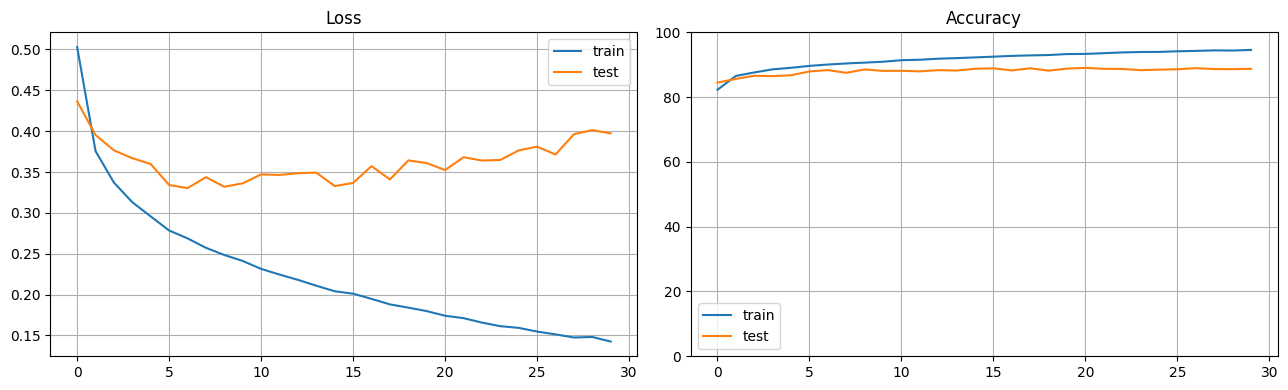

In [ ]:
plot_history(history)

In [ ]:
result_collect = {}
history_collect = {}

In [ ]:
activation_functions = [
    'linear',
    'relu',
    'tanh',
    'elu',
    'softplus',
    'sigmoid'
]

In [ ]:
for activator in activation_functions:
    model = k.models.Sequential([
        k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
        k.layers.Dense(128, activation = activator, name = 'Hidden_1'),
        k.layers.Dense(10, activation = 'softmax', name = 'Output')
    ])

    model.compile(
        loss= k.losses.SparseCategoricalCrossentropy,
        optimizer=k.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    history_model = model.fit(
        x_train,
        y_train,
        epochs=30,
        validation_data=(x_test, y_test),
        verbose=1,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

    history_collect[activator] = history_model

    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    result_collect[activator] = [train_loss, train_acc, test_loss, test_acc]

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7760 - loss: 0.6440 - val_accuracy: 0.8292 - val_loss: 0.4872
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8415 - loss: 0.4607 - val_accuracy: 0.8301 - val_loss: 0.4880
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8490 - loss: 0.4344 - val_accuracy: 0.8322 - val_loss: 0.4892
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8498 - loss: 0.4281 - val_accuracy: 0.8313 - val_loss: 0.4849
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8512 - loss: 0.4240 - val_accuracy: 0.8397 - val_loss: 0.4630
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8542 - loss: 0.4202 - val_accuracy: 0.8132 - val_loss: 0.5333
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8504 - loss: 0.4191 - val_accuracy: 0.8401 - val_loss: 0.4554
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8550 - loss: 0.4107 -

In [ ]:
pd.DataFrame(result_collect)

,linear,relu,tanh,elu,softplus,sigmoid
0,0.372180,0.219613,0.206123,0.220149,0.220033,0.189811
1,0.868683,0.919550,0.922583,0.917217,0.916917,0.930833
2,0.441708,0.335575,0.332103,0.329790,0.326774,0.317145
3,0.844700,0.881400,0.883600,0.883300,0.888000,0.887600


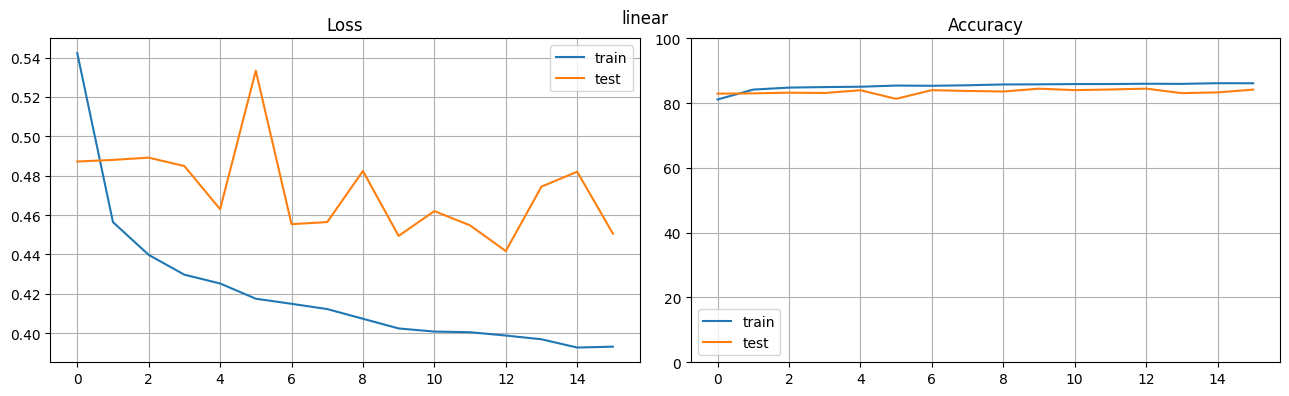

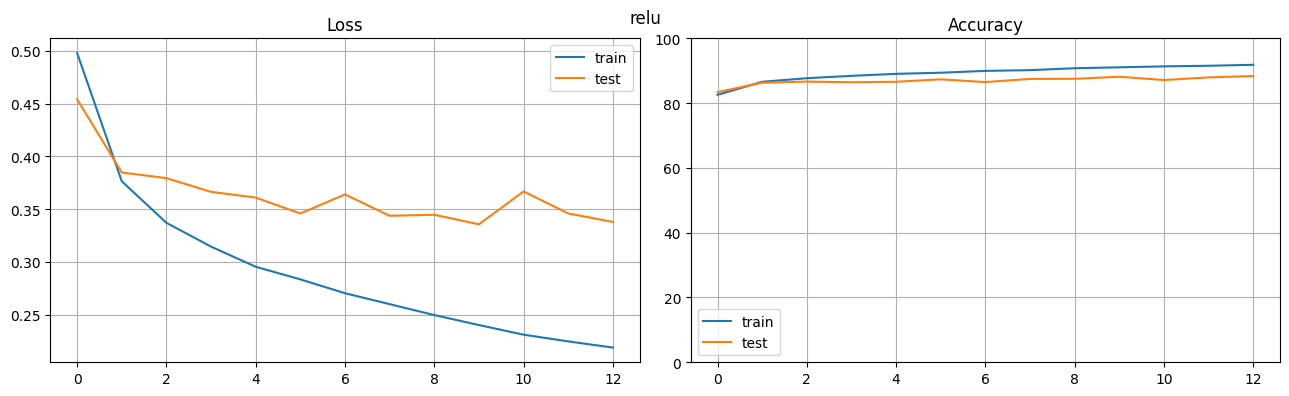

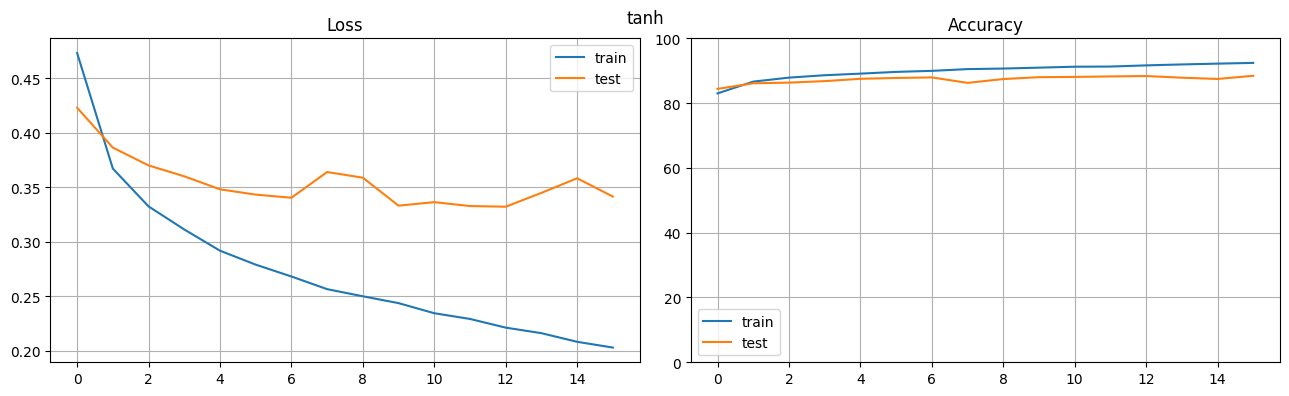

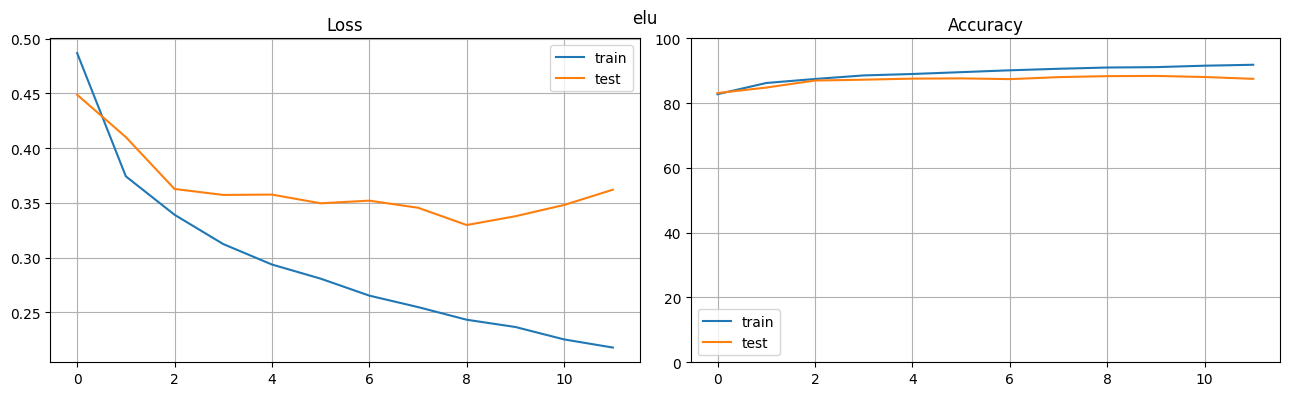

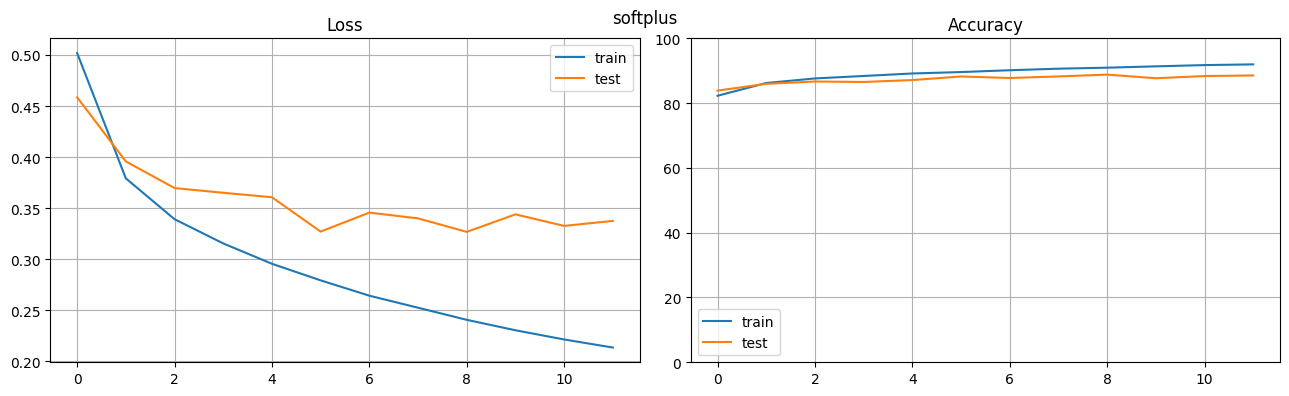

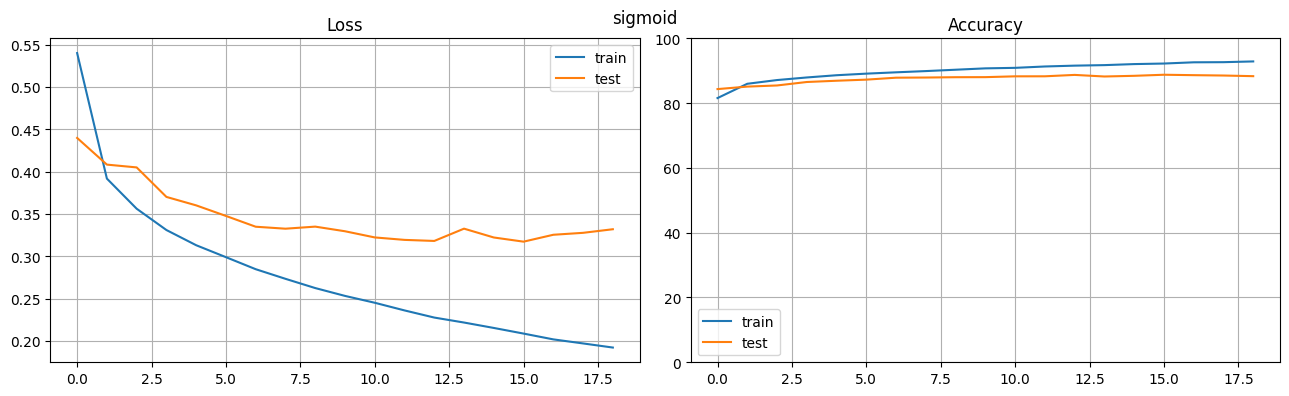

In [ ]:
for i in history_collect:
    plot_history(history_collect[i], i)

In [ ]:
result_collect = {}
history_collect = {}

In [ ]:
activation_functions = [
    'tanh',
    'softplus',
    'sigmoid'
]

optimizers_list = [
    k.optimizers.Adam,
    k.optimizers.Adagrad,
    k.optimizers.AdamW,
    k.optimizers.Adamax,
    k.optimizers.Ftrl,
    k.optimizers.Lion,
    k.optimizers.Nadam,
    k.optimizers.RMSprop,
    k.optimizers.SGD
]

In [ ]:
n = product(activation_functions, optimizers_list)

for idx, i in enumerate(n):
    activator, optimizer = i

    print(f" {idx=} {activator=} {optimizer.__name__=}")

    model = k.models.Sequential([
        k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
        k.layers.Dense(128, activation = activator, name = 'Hidden_1'),
        k.layers.Dense(10, activation = 'softmax', name = 'Output')
    ])

    model.compile(
        loss= k.losses.SparseCategoricalCrossentropy,
        optimizer=optimizer(learning_rate=0.001),
        metrics=['accuracy']
    )

    history_model = model.fit(
        x_train,
        y_train,
        epochs=20,
        validation_data=(x_test, y_test),
        verbose=0,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

    history_collect[f"({activator=} {optimizer.__name__=}"] = history_model

    train_loss, train_acc = model.evaluate(x_train, y_train)
    test_loss, test_acc = model.evaluate(x_test, y_test,)
    result_collect[f"({activator=} {optimizer.__name__=}"] = [train_loss, train_acc, test_loss, test_acc]

 idx=0 activator='tanh' optimizer.__name__='Adam'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9063 - loss: 0.2555
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8774 - loss: 0.3404
 idx=1 activator='tanh' optimizer.__name__='Adagrad'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8444 - loss: 0.4532
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8344 - loss: 0.4808
 idx=2 activator='tanh' optimizer.__name__='AdamW'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9082 - loss: 0.2490
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8808 - loss: 0.3307
 idx=3 activator='tanh' optimizer.__name__='Adamax'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8957 - loss: 0.2910
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8729 - loss: 0.3522
 idx=4 activator='tanh' optimizer.__name__='Ftrl'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7958 - loss: 0.5838
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7838

In [ ]:
pd.DataFrame({k: v for k, v in sorted(result_collect.items(), key=lambda item: item[1][3], reverse = True)})

,(activator='sigmoid' optimizer.__name__='Adam',(activator='softplus' optimizer.__name__='Adam',(activator='softplus' optimizer.__name__='AdamW',(activator='softplus' optimizer.__name__='Nadam',(activator='tanh' optimizer.__name__='Nadam',(activator='tanh' optimizer.__name__='RMSprop',(activator='softplus' optimizer.__name__='Adamax',(activator='sigmoid' optimizer.__name__='AdamW',(activator='tanh' optimizer.__name__='AdamW',(activator='tanh' optimizer.__name__='Adam',...,(activator='tanh' optimizer.__name__='Lion',(activator='tanh' optimizer.__name__='Adagrad',(activator='tanh' optimizer.__name__='SGD',(activator='softplus' optimizer.__name__='Adagrad',(activator='softplus' optimizer.__name__='SGD',(activator='sigmoid' optimizer.__name__='Adagrad',(activator='tanh' optimizer.__name__='Ftrl',(activator='sigmoid' optimizer.__name__='SGD',(activator='softplus' optimizer.__name__='Ftrl',(activator='sigmoid' optimizer.__name__='Ftrl'
0,0.206100,0.208814,0.220120,0.209238,0.219532,0.222987,0.249353,0.244890,0.251253,0.256246,...,0.442843,0.454984,0.471199,0.489895,0.501864,0.646503,0.583972,0.693664,0.718530,1.302476
1,0.925850,0.922667,0.916000,0.921517,0.920733,0.918783,0.909467,0.910717,0.907000,0.906250,...,0.843267,0.843150,0.837967,0.834050,0.827717,0.790033,0.794717,0.768667,0.743117,0.559117
2,0.318615,0.329208,0.325215,0.330868,0.328687,0.333297,0.334608,0.325935,0.332967,0.337674,...,0.485363,0.486042,0.498587,0.516677,0.527330,0.664188,0.607897,0.709792,0.731714,1.306305
3,0.888300,0.885900,0.885200,0.884700,0.884000,0.883400,0.882500,0.882100,0.880700,0.879500,...,0.828400,0.828000,0.826600,0.821200,0.817800,0.779500,0.779400,0.757800,0.737100,0.558100


## Change model

In [ ]:
model = k.models.Sequential([
    k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
    k.layers.Dense(128, activation = 'relu', name = 'Hidden_1'),
    k.layers.Dropout(0.3),
    k.layers.Dense(256, activation = 'relu', name = 'Hidden_2'),
    k.layers.Dense(10, activation = 'softmax', name = 'Output')
])

In [ ]:
model.summary()

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,074 (531.54 KB)

 Trainable params: 136,074 (531.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss=k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test, y_test), verbose=0)

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


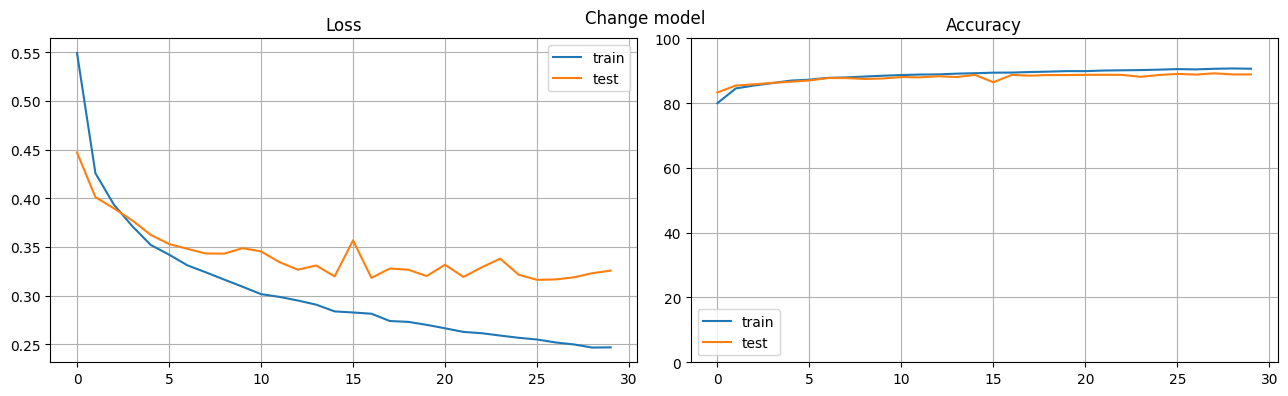

In [ ]:
plot_history(history, "Change model")

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test,)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9274 - loss: 0.2014
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8878 - loss: 0.3281


In [ ]:
result_collect = {}
history_collect = {}

In [ ]:
activation_functions = [
    'linear',
    'relu',
    'tanh',
    'elu',
    'softplus',
    'sigmoid'
]

In [ ]:
for activator in activation_functions:
    model = k.models.Sequential([
        k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
        k.layers.Dense(128, activation = 'relu', name = 'Hidden_1'),
        k.layers.Dropout(0.3),
        k.layers.Dense(256, activation = activator, name = 'Hidden_2'),
        k.layers.Dense(10, activation = 'softmax', name = 'Output')
    ])

    model.compile(
        loss= k.losses.SparseCategoricalCrossentropy,
        optimizer=k.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    history_model = model.fit(
        x_train,
        y_train,
        epochs=15,
        validation_data=(x_test, y_test),
        verbose=0,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

    history_collect[activator] = history_model

    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=1)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
    result_collect[activator] = [train_loss, train_acc, test_loss, test_acc]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9020 - loss: 0.2605
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8747 - loss: 0.3514
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9112 - loss: 0.2370
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8808 - loss: 0.3296
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9026 - loss: 0.2602
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8808 - loss: 0.3306
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9034 - loss: 0.2492
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8802 - loss: 0.3299
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9152 - loss: 0.2279
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8876 - loss: 0.3076
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9163 - loss: 0.2218
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8855 - loss: 0.3134


In [ ]:
pd.DataFrame({k: v for k, v in sorted(result_collect.items(), key=lambda item: item[1][3], reverse = True)})

,softplus,sigmoid,elu,relu,tanh,linear
0,0.229026,0.224777,0.250129,0.238924,0.261772,0.263315
1,0.915300,0.915967,0.903883,0.910200,0.902250,0.900883
2,0.309161,0.318261,0.328356,0.328329,0.334238,0.352125
3,0.887000,0.885900,0.883000,0.882400,0.879000,0.875300


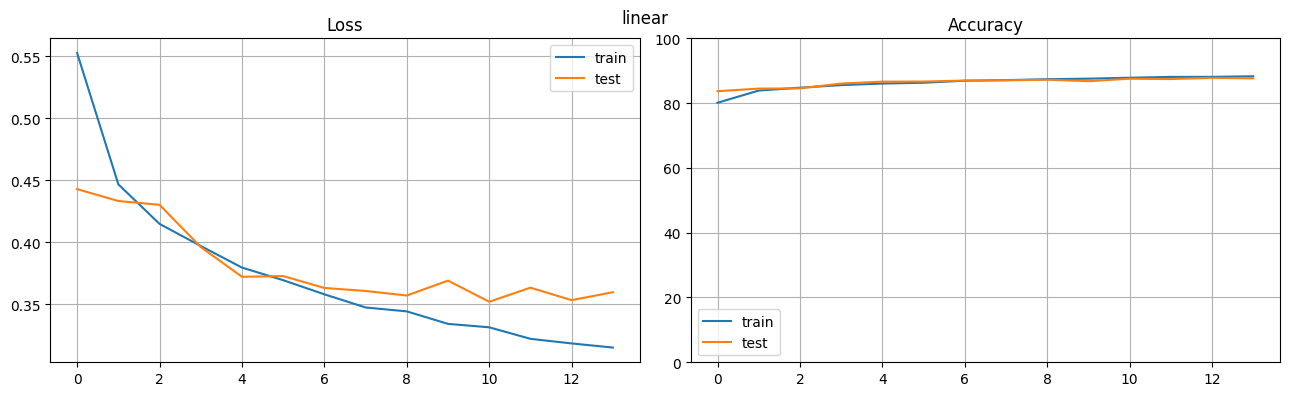

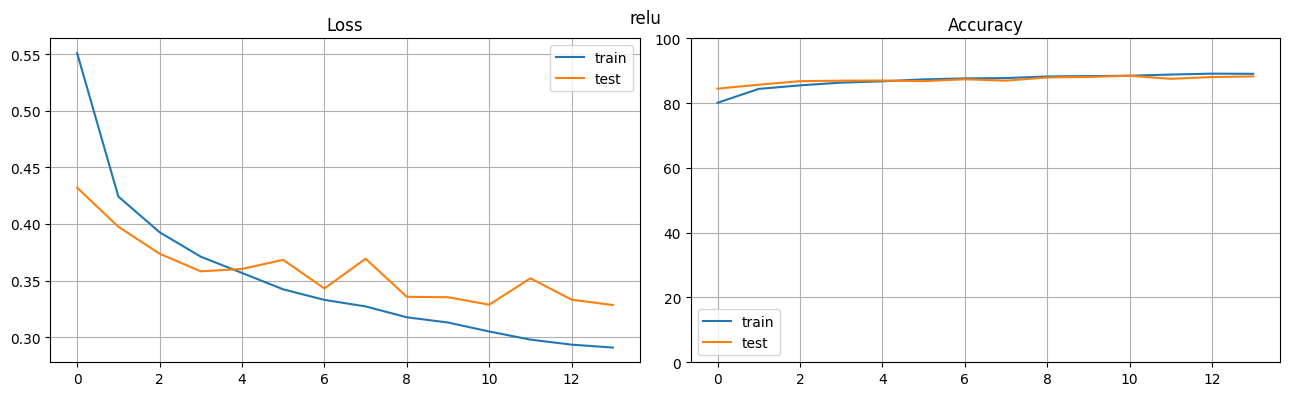

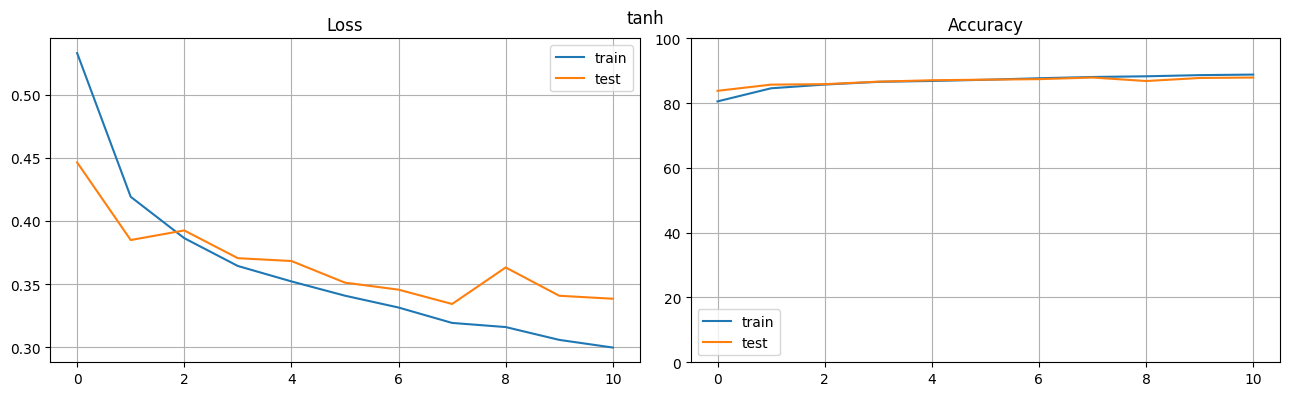

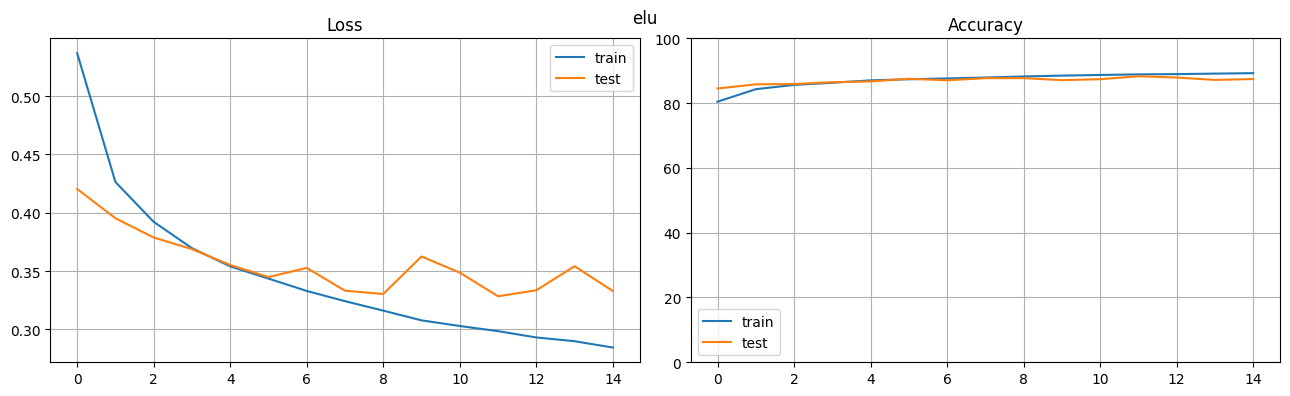

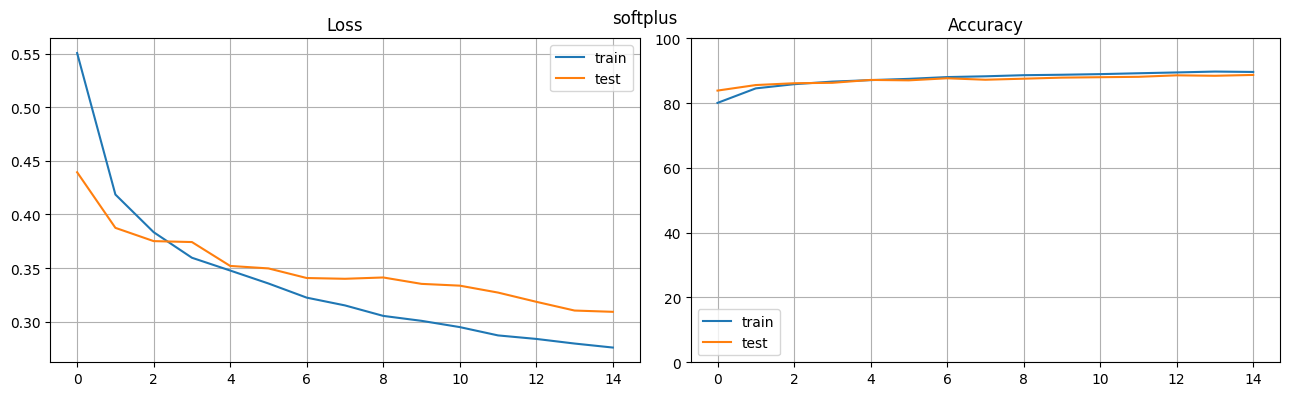

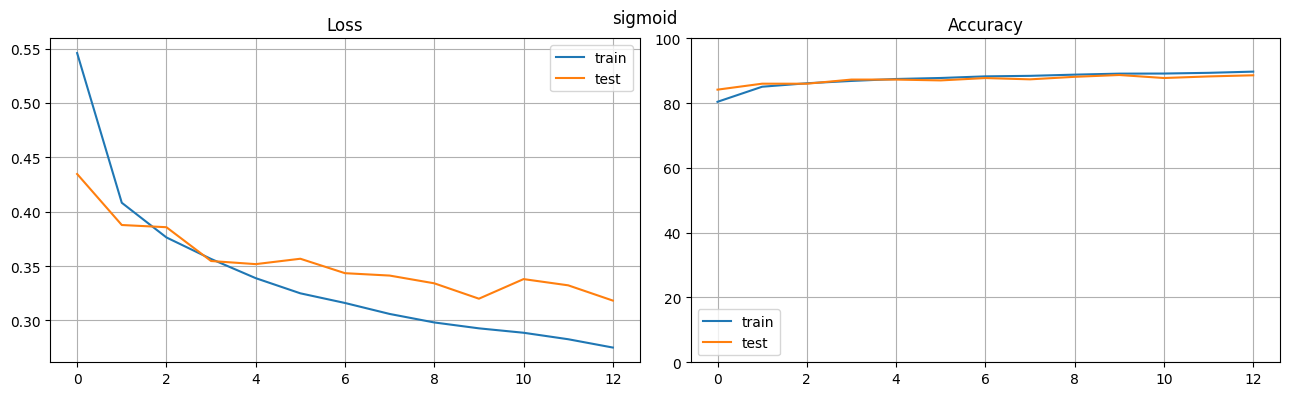

In [ ]:
for i in history_collect:
    plot_history(history_collect[i], i)

In [ ]:
result_collect = {}
history_collect = {}

In [ ]:
activation_functions = [
    'softplus',
    'sigmoid'
]

optimizers_list = [
    k.optimizers.Adam,
    k.optimizers.Adagrad,
    k.optimizers.AdamW,
    k.optimizers.Adamax,
    k.optimizers.Ftrl,
    k.optimizers.Lion,
    k.optimizers.Nadam,
    k.optimizers.RMSprop,
    k.optimizers.SGD
]

In [ ]:
n = product(activation_functions, optimizers_list)

for idx, i in enumerate(n):
    activator, optimizer = i

    print(f" {idx=} {activator=} {optimizer.__name__=}")

    model = k.models.Sequential([
        k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
        k.layers.Dense(128, activation = 'relu', name = 'Hidden_1'),
        k.layers.Dropout(0.3),
        k.layers.Dense(256, activation = activator, name = 'Hidden_2'),
        k.layers.Dense(10, activation = 'softmax', name = 'Output')
    ])

    model.compile(
        loss= k.losses.SparseCategoricalCrossentropy,
        optimizer=optimizer(learning_rate=0.001),
        metrics=['accuracy']
    )

    history_model = model.fit(
        x_train,
        y_train,
        epochs=8,
        validation_data=(x_test, y_test),
        verbose=0,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

    history_collect[f"{activator=} {optimizer.__name__=}"] = history_model

    train_loss, train_acc = model.evaluate(x_train, y_train)
    test_loss, test_acc = model.evaluate(x_test, y_test,)
    result_collect[f"{activator=} {optimizer.__name__=}"] = [train_loss, train_acc, test_loss, test_acc]

 idx=0 activator='softplus' optimizer.__name__='Adam'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9017 - loss: 0.2617
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8814 - loss: 0.3326
 idx=1 activator='softplus' optimizer.__name__='Adagrad'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8133 - loss: 0.5442
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8063 - loss: 0.5578
 idx=2 activator='softplus' optimizer.__name__='AdamW'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8938 - loss: 0.2764
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8740 - loss: 0.3365
 idx=3 activator='softplus' optimizer.__name__='Adamax'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8955 - loss: 0.2879
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8762 - loss: 0.3435
 idx=4 activator='softplus' optimizer.__name__='Ftrl'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0987 - loss: 2.3028
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

In [ ]:
pd.DataFrame({k: v for k, v in sorted(result_collect.items(), key=lambda item: item[1][3], reverse = True)})

,activator='sigmoid' optimizer.__name__='Nadam',activator='sigmoid' optimizer.__name__='AdamW',activator='softplus' optimizer.__name__='Adam',activator='sigmoid' optimizer.__name__='Adam',activator='softplus' optimizer.__name__='RMSprop',activator='softplus' optimizer.__name__='Nadam',activator='softplus' optimizer.__name__='Adamax',activator='sigmoid' optimizer.__name__='Adamax',activator='softplus' optimizer.__name__='AdamW',activator='sigmoid' optimizer.__name__='RMSprop',activator='sigmoid' optimizer.__name__='Lion',activator='softplus' optimizer.__name__='Lion',activator='softplus' optimizer.__name__='Adagrad',activator='softplus' optimizer.__name__='SGD',activator='sigmoid' optimizer.__name__='Adagrad',activator='sigmoid' optimizer.__name__='SGD',activator='softplus' optimizer.__name__='Ftrl',activator='sigmoid' optimizer.__name__='Ftrl'
0,0.258649,0.263660,0.264868,0.261303,0.284279,0.264365,0.289668,0.296177,0.277914,0.306348,0.429179,0.463129,0.545467,0.619351,0.688926,0.853121,2.302698,2.302691
1,0.902233,0.902317,0.900883,0.902367,0.898217,0.901300,0.894500,0.891700,0.894967,0.886150,0.844567,0.834750,0.812867,0.782117,0.761650,0.724033,0.100000,0.100000
2,0.334269,0.335795,0.331154,0.332406,0.362648,0.333746,0.349858,0.355848,0.345224,0.359789,0.474218,0.501148,0.566801,0.634044,0.703815,0.863840,2.302697,2.302693
3,0.882300,0.881600,0.880200,0.879000,0.877500,0.876100,0.874500,0.870400,0.870200,0.869600,0.831100,0.823300,0.802000,0.773300,0.751900,0.716000,0.100000,0.100000


In [ ]:
result_collect = {}
history_collect = {}

In [ ]:
activation_functions = [
    'relu',
    'softplus',
    'sigmoid'
]

optimizers_list = optimizers_list = [
    k.optimizers.Adam,
    k.optimizers.Nadam,
    k.optimizers.RMSprop,
    k.optimizers.SGD
]

epochs_list = [8, 15]

learning_rates = [0.001, 0.005]

bach_size_list = [32, 64]


In [ ]:
n = product(activation_functions, optimizers_list, epochs_list, learning_rates, bach_size_list)

for idx, i in enumerate(n):
    activator, optimizer, epochs, learning_rate,  batch_size = i

    print(f" {idx=} {activator=} {optimizer.__name__=} {epochs=} {learning_rate=} {batch_size=}")

    model = k.models.Sequential([
        k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
        k.layers.Dense(128, activation = 'relu', name = 'Hidden_1'),
        k.layers.Dropout(0.3),
        k.layers.Dense(256, activation = activator, name = 'Hidden_2'),
        k.layers.Dense(10, activation = 'softmax', name = 'Output')
    ])

    model.compile(
        loss= k.losses.SparseCategoricalCrossentropy,
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    history_model = model.fit(
        x_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, y_test),
        verbose=0,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

    history_collect[f"{activator=} {optimizer.__name__=} {epochs=} {learning_rate=} {batch_size=}"] = history_model

    train_loss, train_acc = model.evaluate(x_train, y_train)
    test_loss, test_acc = model.evaluate(x_test, y_test,)
    result_collect[f"{activator=} {optimizer.__name__=} {epochs=} {learning_rate=} {batch_size=}"] = [train_loss, train_acc, test_loss, test_acc]

 idx=0 activator='relu' optimizer.__name__='Adam' epochs=8 learning_rate=0.001 batch_size=32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8997 - loss: 0.2709
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8752 - loss: 0.3484
 idx=1 activator='relu' optimizer.__name__='Adam' epochs=8 learning_rate=0.001 batch_size=64
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9041 - loss: 0.2572
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8799 - loss: 0.3293
 idx=2 activator='relu' optimizer.__name__='Adam' epochs=8 learning_rate=0.005 batch_size=32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8703 - loss: 0.3707
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8579 - loss: 0.4125
 idx=3 activator='relu' optimizer.__name__='Adam' epochs=8 learning_rate=0.005 batch_size=64
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8770 - loss: 0.3283
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8629 - loss: 0.3823
 idx=4 activator='re

In [ ]:
pd.DataFrame({k: v for k, v in sorted(result_collect.items(), key=lambda item: item[1][3], reverse = True)})

,activator='softplus' optimizer.__name__='Adam' epochs=15 learning_rate=0.001 batch_size=64,activator='softplus' optimizer.__name__='Nadam' epochs=15 learning_rate=0.001 batch_size=64,activator='softplus' optimizer.__name__='Adam' epochs=15 learning_rate=0.001 batch_size=32,activator='sigmoid' optimizer.__name__='Adam' epochs=15 learning_rate=0.001 batch_size=32,activator='relu' optimizer.__name__='Nadam' epochs=15 learning_rate=0.001 batch_size=32,activator='relu' optimizer.__name__='Nadam' epochs=8 learning_rate=0.001 batch_size=64,activator='softplus' optimizer.__name__='Nadam' epochs=15 learning_rate=0.001 batch_size=32,activator='sigmoid' optimizer.__name__='Adam' epochs=8 learning_rate=0.001 batch_size=32,activator='softplus' optimizer.__name__='RMSprop' epochs=15 learning_rate=0.001 batch_size=64,activator='sigmoid' optimizer.__name__='RMSprop' epochs=15 learning_rate=0.001 batch_size=64,...,activator='relu' optimizer.__name__='SGD' epochs=15 learning_rate=0.001 batch_size=64,activator='softplus' optimizer.__name__='SGD' epochs=15 learning_rate=0.001 batch_size=64,activator='softplus' optimizer.__name__='SGD' epochs=8 learning_rate=0.001 batch_size=32,activator='sigmoid' optimizer.__name__='SGD' epochs=8 learning_rate=0.005 batch_size=64,activator='relu' optimizer.__name__='SGD' epochs=8 learning_rate=0.001 batch_size=64,activator='sigmoid' optimizer.__name__='SGD' epochs=15 learning_rate=0.001 batch_size=32,activator='softplus' optimizer.__name__='SGD' epochs=8 learning_rate=0.001 batch_size=64,activator='sigmoid' optimizer.__name__='SGD' epochs=8 learning_rate=0.001 batch_size=32,activator='sigmoid' optimizer.__name__='SGD' epochs=15 learning_rate=0.001 batch_size=64,activator='sigmoid' optimizer.__name__='SGD' epochs=8 learning_rate=0.001 batch_size=64
0,0.221526,0.230811,0.233481,0.218144,0.246357,0.260065,0.246732,0.251111,0.266432,0.245026,...,0.592202,0.617182,0.621857,0.649589,0.691340,0.694543,0.738406,0.852182,0.875018,1.174629
1,0.914683,0.913817,0.913550,0.916733,0.906883,0.902733,0.906733,0.906483,0.901050,0.909133,...,0.795150,0.785083,0.781150,0.763183,0.757217,0.753600,0.750433,0.727917,0.729700,0.691717
2,0.314310,0.312073,0.316887,0.312038,0.323571,0.332988,0.321546,0.327119,0.339319,0.325884,...,0.611667,0.634940,0.633982,0.663251,0.710702,0.710414,0.750963,0.861743,0.884862,1.180406
3,0.887600,0.887600,0.885000,0.884700,0.883600,0.883000,0.882800,0.881800,0.881300,0.881300,...,0.786900,0.775000,0.773100,0.757000,0.743500,0.743400,0.743100,0.723300,0.721600,0.686400


## HipperParam

In [39]:
result_collect = {}
history_collect = {}

In [38]:
learning_rates = [0.001, 0.002, 0.003, 0.0001, 0.0002, 0.0003]

In [41]:
model = model = k.models.Sequential([
    k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
    k.layers.Dense(128, activation = 'sigmoid', name = 'Hidden_1'),
    k.layers.Dense(10, activation = 'softmax', name = 'Output')
])

model_2 = k.models.Sequential([
      k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
      k.layers.Dense(128, activation = 'relu', name = 'Hidden_1'),
      k.layers.Dropout(0.3),
      k.layers.Dense(256, activation = 'softplus', name = 'Hidden_2'),
      k.layers.Dense(10, activation = 'softmax', name = 'Output')
  ])

for learning_rate in learning_rates :

  print(f"{learning_rate=}")

  model.compile(
    loss=k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy'],
  )

  model_2.compile(
      loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=k.optimizers.Nadam(learning_rate=learning_rate),
      metrics=['accuracy']
    )

  history_model = model.fit(
        x_train,
        y_train,
        epochs=20,
        # batch_size=256,
        validation_data=(x_test, y_test),
        verbose=0,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

  history_collect[f"Model {learning_rate=}"] = history_model

  train_loss, train_acc = model.evaluate(x_train, y_train)
  test_loss, test_acc = model.evaluate(x_test, y_test,)

  result_collect[f"Model {learning_rate=}"] = [train_loss, train_acc, test_loss, test_acc]

  history_model = model_2.fit(
        x_train,
        y_train,
        epochs=15,
        batch_size=64,
        validation_data=(x_test, y_test),
        verbose=0,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

  history_collect[f"Model_2 {learning_rate=}"] = history_model

  train_loss, train_acc = model_2.evaluate(x_train, y_train)
  test_loss, test_acc = model_2.evaluate(x_test, y_test,)

  result_collect[f"Model_2 {learning_rate=}"] = [train_loss, train_acc, test_loss, test_acc]

learning_rate=0.001
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9237 - loss: 0.2133
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8881 - loss: 0.3130
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9229 - loss: 0.2082
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8877 - loss: 0.3081
learning_rate=0.002
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9274 - loss: 0.1965
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8824 - loss: 0.3236
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9145 - loss: 0.2289
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8828 - loss: 0.3185
learning_rate=0.003
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9230 - loss: 0.2099
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8813 - loss: 0.3455
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9058 - loss: 0.2457
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8807 - loss: 0.3251
learning_rate=0.0001
1875/18

In [42]:
pd.DataFrame({k: v for k, v in sorted(result_collect.items(), key=lambda item: item[1][3], reverse = True)})

,Model_2 learning_rate=0.0002,Model_2 learning_rate=0.0001,Model_2 learning_rate=0.0003,Model learning_rate=0.0001,Model learning_rate=0.0002,Model learning_rate=0.0003,Model_2 learning_rate=0.001,Model learning_rate=0.001,Model learning_rate=0.002,Model learning_rate=0.003,Model_2 learning_rate=0.002,Model_2 learning_rate=0.003
0,0.164562,0.174590,0.154483,0.159515,0.156900,0.150672,0.210776,0.215201,0.199130,0.211991,0.230907,0.247006
1,0.938567,0.934150,0.942517,0.941817,0.943833,0.945983,0.922000,0.922300,0.926250,0.921983,0.912533,0.905717
2,0.292076,0.288824,0.293392,0.318421,0.319759,0.321135,0.310058,0.315498,0.326251,0.343789,0.318858,0.329667
3,0.899600,0.899200,0.898900,0.891700,0.891500,0.890500,0.888700,0.886500,0.883500,0.882400,0.882100,0.881100


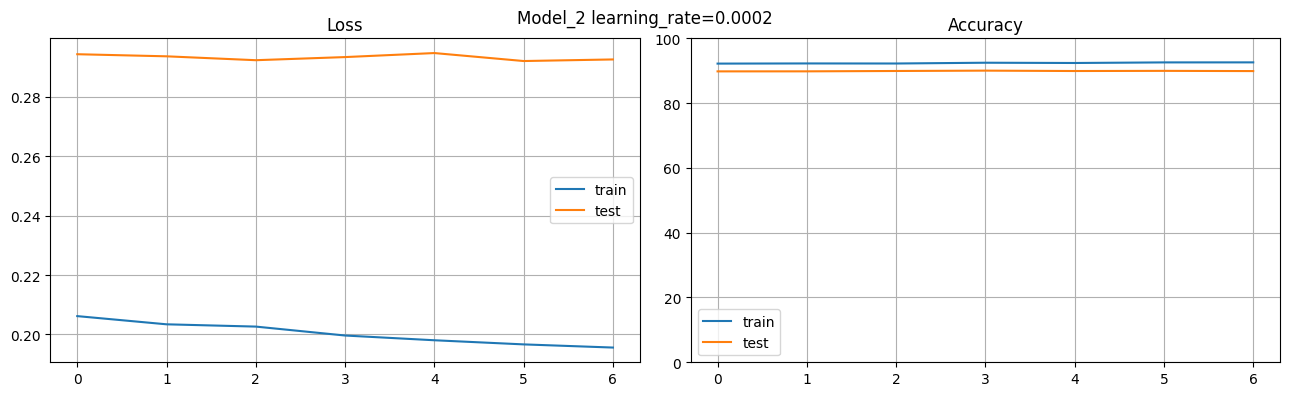

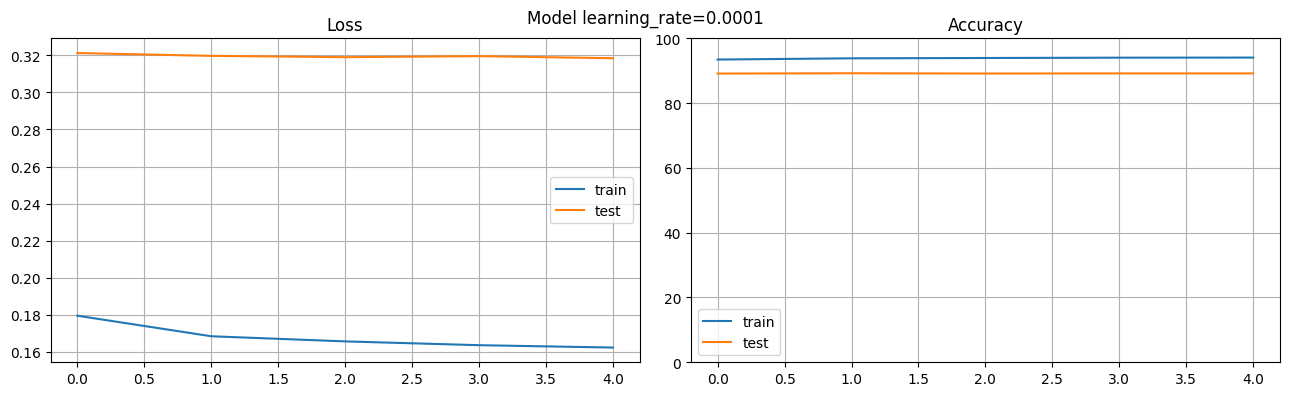

In [45]:
plot_history(history_collect["Model_2 learning_rate=0.0002"], 'Model_2 learning_rate=0.0002')
plot_history(history_collect["Model learning_rate=0.0001"], 'Model learning_rate=0.0001')

In [47]:
model.compile(
    loss=k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy'],
  )

model.fit(
        x_train,
        y_train,
        epochs=20,
        validation_data=(x_test, y_test),
        verbose=0,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

model_2.compile(
      loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=k.optimizers.Nadam(learning_rate=0.0002),
      metrics=['accuracy']
    )

model_2.fit(
        x_train,
        y_train,
        epochs=15,
        batch_size=64,
        validation_data=(x_test, y_test),
        verbose=0,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

In [86]:
def view_confusion_matrix(test_pred_values, title):

  print(title)

  conf_matrix = confusion_matrix(y_test, test_pred_values)

  plt.figure(figsize=(8, 6))

  sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='g') ## color
  plt.xlabel("Predicted")
  plt.subtitle= title
  plt.show()

  c_report = classification_report(y_test, test_pred_values, output_dict=True)
  print(classification_report(y_test, test_pred_values, target_names=labels))
  average_error = 1 -c_report['accuracy']
  print(f"Average error {average_error:.2%}" )

Model


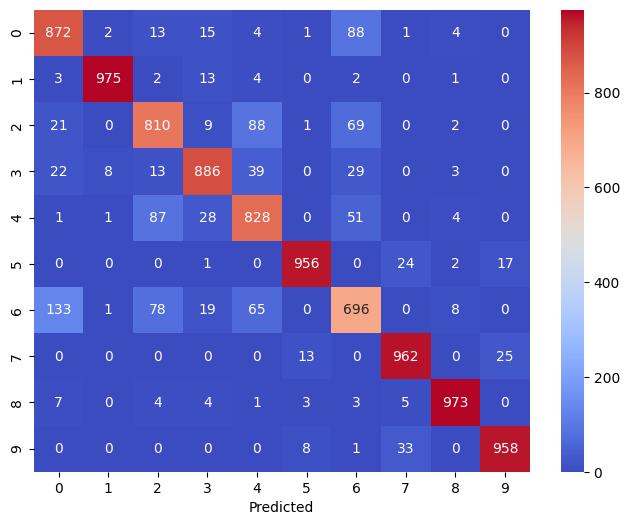

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.87      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.81      0.81      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.80      0.83      0.82      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.74      0.70      0.72      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Average error 10.84%
Model_2


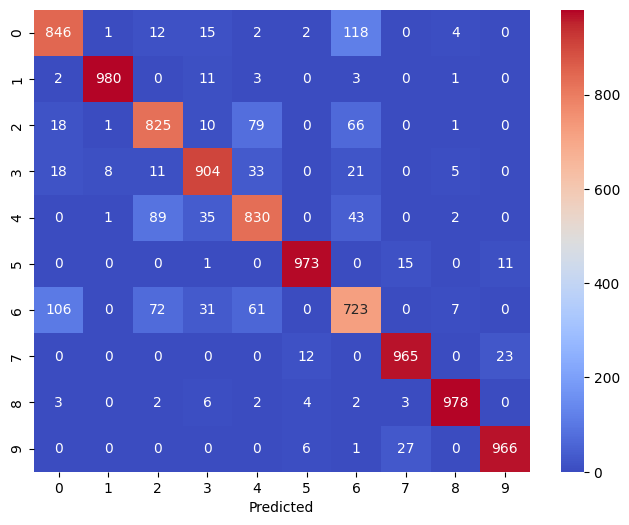

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.82      0.82      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.82      0.83      0.83      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.74      0.72      0.73      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Average error 10.10%


In [87]:
test_predict_model = model.predict(x_test, verbose=0)
view_confusion_matrix(tf.math.argmax(test_predict_model, axis=1), "Model")

test_predict_model_2 = model_2.predict(x_test, verbose=0)
view_confusion_matrix(tf.math.argmax(test_predict_model_2, axis=1), "Model_2")


Model_2 Win

Visuslization

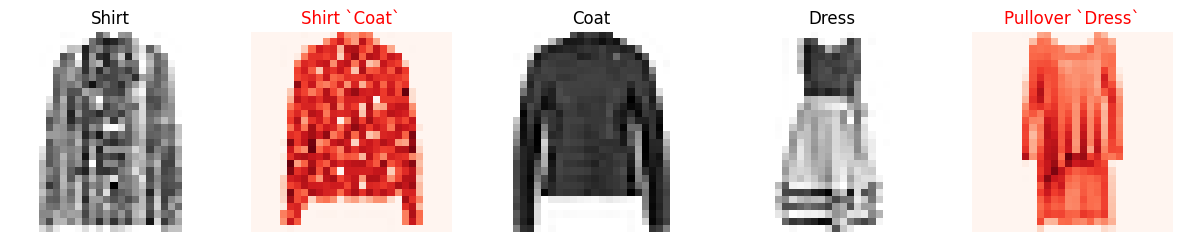

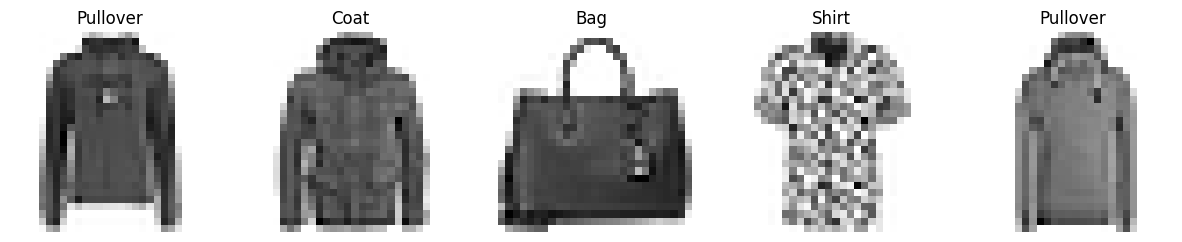

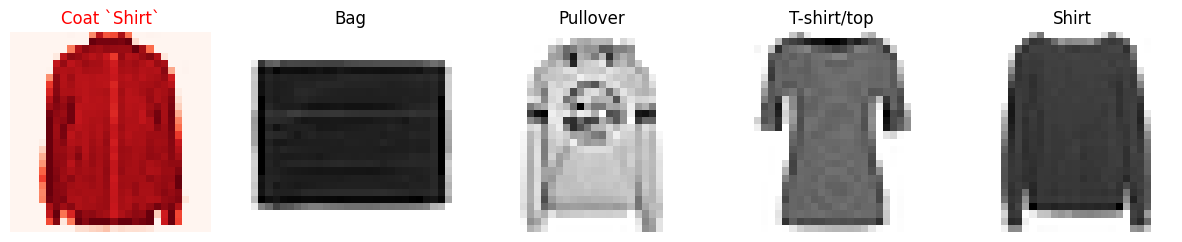

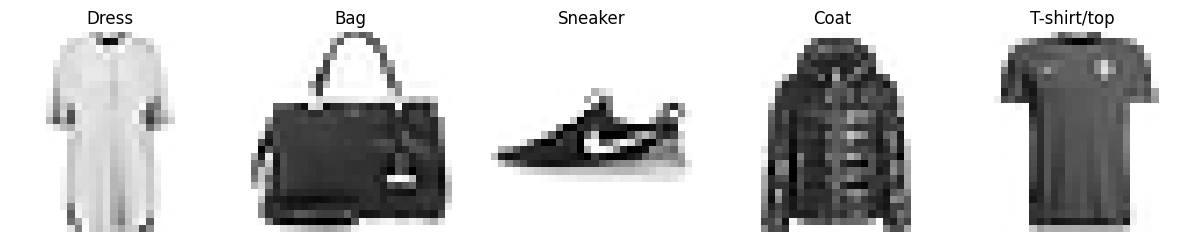

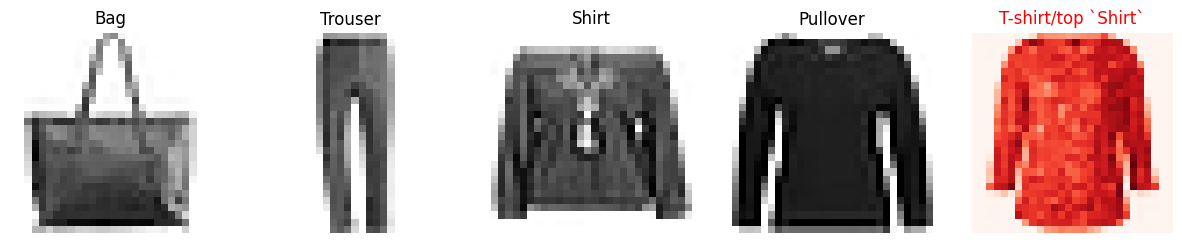

In [105]:
from importlib import reload
plt=reload(plt)

for _ in range(5):
    random_in_test = np.random.randint(0, len(x_test), 5)
    x_random = x_test[random_in_test]
    y_random = y_test[random_in_test]

    random_predict = model_2.predict(x_random, verbose=0)

    img_size = 28

    fig = plt.figure(figsize=(15,6))
    for idx, i in enumerate(np.argmax(random_predict, axis=1)):
        value_correct = y_random[idx] == i
        plt.subplot(1, 5, idx + 1)
        plt.imshow(x_random[idx].reshape(img_size, img_size), cmap = 'gray_r' if value_correct else 'Reds')
        plt.title(labels[y_random[idx]]  + ("" if value_correct else f' `{labels[i]}`'), color = 'black' if value_correct else 'r')
        plt.axis("off")
    plt.show()

Resume

Як бачимо - перша і друга модель при налаштуваяннях мало чим відрізняются у показниках якості, однак друга модель, імовірно, була налаштована більш якісно, тому обіраємо ії. (Це не означає шо першу модель не можна доналаштувати, та другу також можна покращіти)

Можна помітити шо у всіх моделей є проблема з категоріей 6 (Shirt). Також не дуже високі показніки для категорій : 0 (T-shirt/top), 2 (Pullover), 4 (Coat). Напевно це можна буде покращіти.